# FINAL CAPSTONE PROJECT #1

- In this project, we will conduct basic Exploratory Data Analysis (EDA) on the Kyphosis disease dataset. 
- Kyphosis is an abnormal excessive curvature of the spine. 
- The dataset contains 81 rows and 4 columns of data from children who underwent corrective spinal surgery
    - INPUTS: 1. "Age": in months, 2. "Number": number of vertebrae involved, 3. "Start": number of the first (topmost) vertebra operated on.
    - OUTPUTS: "Kyphosis" with 2 unique values: "absent" and "present" indicating whether kyphosis (a type of deformity) is present after surgery.
- Using the "kyphosis.csv" file provided in the appendix, write a Python script to perform the following tasks:
    1. Import the "kyphosis.csv" file using Pandas.
    2. Perform Exploratory Data Analysis (EDA) on the data.
    3. Calculate the average, minimum, and maximum age (in years) using 2 methods.
    4. Plot a correlation matrix.
    5. Convert the data type of the "Age" column from int64 to float64.
    6. Define a function to convert age from months to years.
    7. Apply the function to the "Age" column and add the result to a new column titled "Age in Years".
    8. What are the characteristics of the oldest and youngest children in this study?
    9. Scale the raw "Age" column (in months) using standardization & normalization. Then, perform a sanity check.


**Import the "kyphosis.csv" file using Pandas.**

In [57]:
import pandas as pd

data = pd.read_csv("kyphosis.csv")


**Perform Exploratory Data Analysis (EDA) on the data.**


In [58]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [59]:
encode = pd.get_dummies(data['Kyphosis'])
print(encode)

    absent  present
0        1        0
1        1        0
2        0        1
3        1        0
4        1        0
..     ...      ...
76       0        1
77       1        0
78       1        0
79       0        1
80       1        0

[81 rows x 2 columns]


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**Calculate the average, minimum, and maximum age (in years) using 2 methods.**

In [61]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [62]:
data.mean()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_17824\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Age       83.654321
Number     4.049383
Start     11.493827
dtype: float64

In [63]:
data.max()

Kyphosis    present
Age             206
Number           10
Start            18
dtype: object

In [64]:
data.min()

Kyphosis    absent
Age              1
Number           2
Start            1
dtype: object

**Plot a correlation matrix.**

<AxesSubplot: >

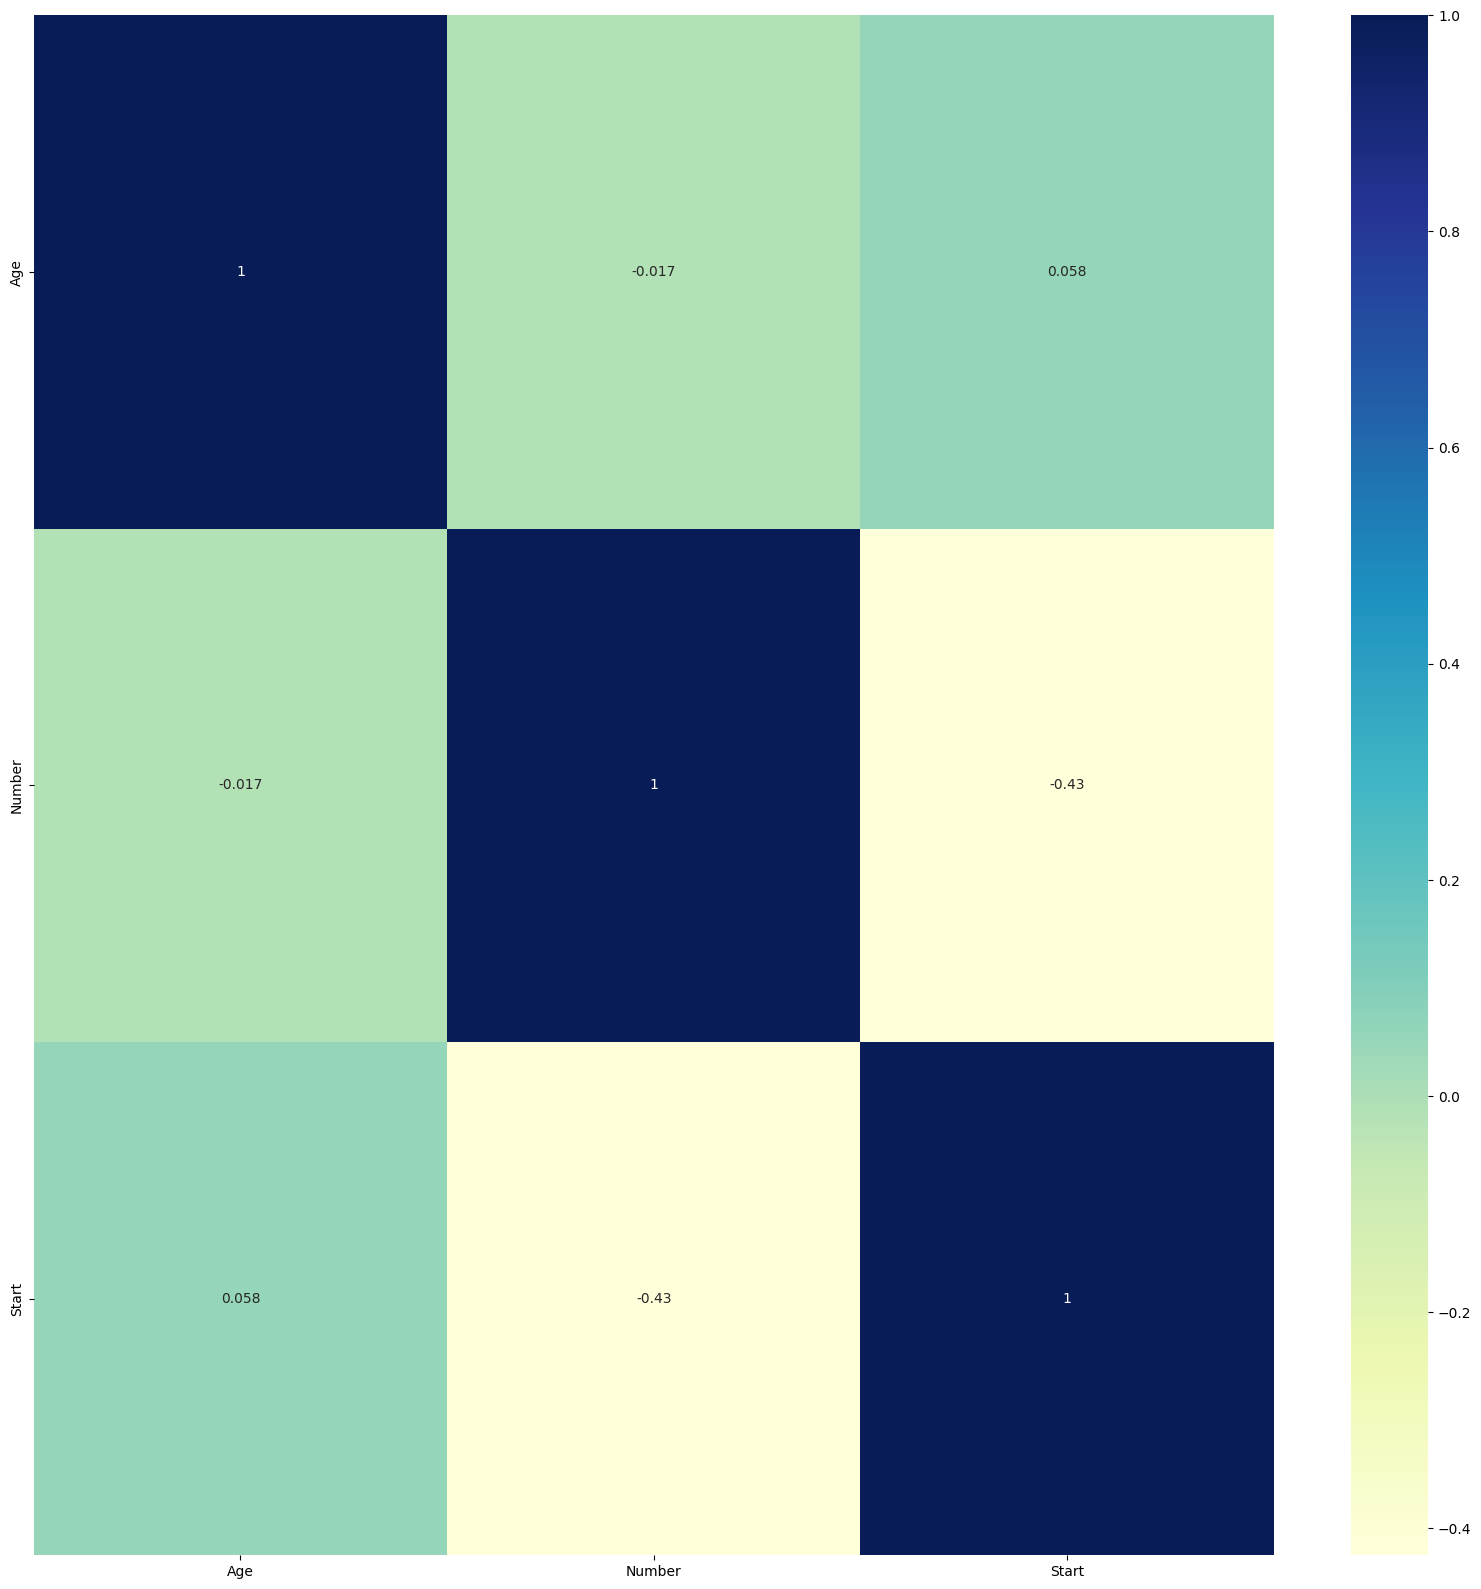

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlations = numeric_columns.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap='YlGnBu')

**Convert the data type of the "Age" column from int64 to float64.**

In [66]:
data['Age'] = data['Age'].astype('float64')

In [67]:
data['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 81 entries, 0 to 80
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
81 non-null     float64
dtypes: float64(1)
memory usage: 776.0 bytes


**Define a function to convert age from months to years.**

In [68]:
def convert_age(month):
    month = month/12
    return month

**Apply the function to the "Age" column and add the result to a new column titled "Age in Years".**

In [69]:
convert_data = data['Age'].apply(convert_age)

In [70]:
data['Age'].describe()

count     81.000000
mean      83.654321
std       58.104251
min        1.000000
25%       26.000000
50%       87.000000
75%      130.000000
max      206.000000
Name: Age, dtype: float64

In [71]:
data = pd.concat([data, convert_data], axis=1)

In [72]:
data.columns.values[4] = "Age in Years"

In [73]:
data

,Kyphosis,Age,Number,Start,Age in Years
0,absent,71.0,3,5,5.916667
1,absent,158.0,3,14,13.166667
2,present,128.0,4,5,10.666667
3,absent,2.0,5,1,0.166667
4,absent,1.0,4,15,0.083333
...,...,...,...,...,...
76,present,157.0,3,13,13.083333
77,absent,26.0,7,13,2.166667
78,absent,120.0,2,13,10.000000
79,present,42.0,7,6,3.500000


In [74]:
data

,Kyphosis,Age,Number,Start,Age in Years
0,absent,71.0,3,5,5.916667
1,absent,158.0,3,14,13.166667
2,present,128.0,4,5,10.666667
3,absent,2.0,5,1,0.166667
4,absent,1.0,4,15,0.083333
...,...,...,...,...,...
76,present,157.0,3,13,13.083333
77,absent,26.0,7,13,2.166667
78,absent,120.0,2,13,10.000000
79,present,42.0,7,6,3.500000


**What are the characteristics of the oldest and youngest children in this study?**

**Scale the raw "Age" column (in months) using standardization & normalization. Then, perform a sanity check.**